In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas, plot_stat_map
from nilearn.image import iter_img

In [8]:
#canica.components_img_.to_filename('ica_components.nii.gz')

## Files can be loaded from the Google Drive

## Analysis of images belonging to the same assessed risk value

In [1]:
import pandas as pd
events = pd.read_csv('sub-01_task-mixedgamblestask_run-01_events.tsv', sep='\t')
events.head()


,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time
0,0.0,3,0.1273,-0.0814,-0.139,20,15,5.15,0,-1,0.000
1,4.0,3,-0.0227,-0.4147,-0.189,18,12,6.12,2,1,1.793
2,8.0,3,0.1273,0.2519,-0.389,10,15,-4.85,3,0,1.637
3,18.0,3,0.1773,-0.0814,0.211,34,16,18.16,1,1,1.316
4,24.0,3,-0.3727,-0.0814,-0.189,18,5,13.05,1,1,1.670


Choosing events where subjective loss was the largest - 4 (corresponds to strong rejection of gamble)

In [15]:
# events where subjective loss was the largest
# 0 = strongly accept, 4- strongly reject
onsets = events[events['respnum'] == 4]
onsets.head()

,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time
12,74.0,3,0.2273,0.5853,-0.289,14,17,-2.83,4,0,1.822
14,82.0,3,0.3773,0.5853,-0.289,14,20,-5.80,4,0,1.206
26,134.0,3,0.3773,0.5853,-0.239,16,20,-3.80,4,0,1.047
29,156.0,3,0.1273,0.2519,-0.339,12,15,-2.85,4,0,1.082
59,342.0,3,-0.0727,-0.0814,-0.389,10,11,-0.89,4,0,1.806


In [16]:
onsets = onsets['onset'].values.tolist()
onsets

[74.0, 82.0, 134.0, 156.0, 342.0, 346.0, 386.0, 402.0, 458.0]

Merging volumes corresponding to events where subjective loss was the largest

In [17]:
from preprocess import *
merge_files_based_on_timestamps(onsets, output_prefix='loss')
# files merged using fslmaths command with "-add" parameter

['fslmaths', 'merged_run1_slices_37_38_onset_74.nii.gz', '-add', 'merged_run1_slices_41_42_onset_82.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_37_38_onset_74.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_41_42_onset_82.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_67_68_69_onset_134.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_78_79_onset_156.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_171_172_onset_342.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_173_174_onset_346.nii.gz', 'loss_merged.nii.gz']
['fslmaths', 'loss_merged.nii.gz', '-add', 'merged_run1_slices_193_194_195_196_197_198_onset_386.nii.gz', 'loss_merged.nii.gz']


### Large subjective attractiveness - weak acceptance of gamble

In [2]:
onsets_win = events[events['respnum'] == 1]
onsets_win = onsets_win['onset'].values.tolist()
onsets_win

[18.0,
 24.0,
 46.0,
 52.0,
 62.0,
 90.0,
 102.0,
 116.0,
 126.0,
 130.0,
 140.0,
 170.0,
 208.0,
 212.0,
 220.0,
 224.0,
 238.0,
 266.0,
 272.0,
 280.0,
 310.0,
 316.0,
 320.0,
 330.0,
 336.0,
 360.0,
 364.0,
 412.0,
 420.0,
 444.0,
 448.0,
 466.0]

In [3]:
from preprocess import *
merge_files_based_on_timestamps(onsets_win, output_prefix='win')

['fslmaths', 'merged_run1_slices_9_10_11_onset_18.nii.gz', '-add', 'merged_run1_slices_12_13_onset_24.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_9_10_11_onset_18.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_12_13_onset_24.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_23_24_25_onset_46.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_26_27_onset_52.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_31_32_33_34_35_36_onset_62.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_45_46_onset_90.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_51_52_onset_102.nii.gz', 'win_merged.nii.gz']
['fslmaths', 'win_merged.nii.gz', '-add', 'merged_run1_slices_58_59_onset_116.nii.gz', 'win_merged.ni

[MultiNiftiMasker.fit] Loading data from [../test.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[Memory]0.0s, 0.0min    : Loading randomized_svd from nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/728e2650c89e35cc2817f45fc6eefb6e
______________________________________randomized_svd cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/dfe3889fb8a65e66cecbef7110d699bc
_____________________________________________fastica cache loaded - 0.1s, 0.0min


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


[Memory]0.8s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/d143522976d88f04c1840532c1a53562
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.0s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/529613040ea3c0500b3bae252126f452
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/a5e0ceabae39a901c357afb07c0b4a77
_____________________________________________fastica cache loaded - 0.1s, 0.0min


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.5s


[Memory]2.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/01b3a009d4b1442809fe8b5069180acf
_____________________________________________fastica cache loaded - 0.2s, 0.0min
[Memory]3.1s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/370baf53b638d10d9c4c2c2b51d0399b
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]3.6s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/93c64b8a120293b504903a4d72c1146f
_____________________________________________fastica cache loaded - 0.1s, 0.0min


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    3.4s


[Memory]4.0s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/ea28dbc2d5571ec51471f765de37b01f
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]4.5s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/525c858e5c9b6719c6644ca45cd8b8a8
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]4.9s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/f0775d86b909aaa47c0d9e70bce78685
_____________________________________________fastica cache loaded - 0.1s, 0.0min


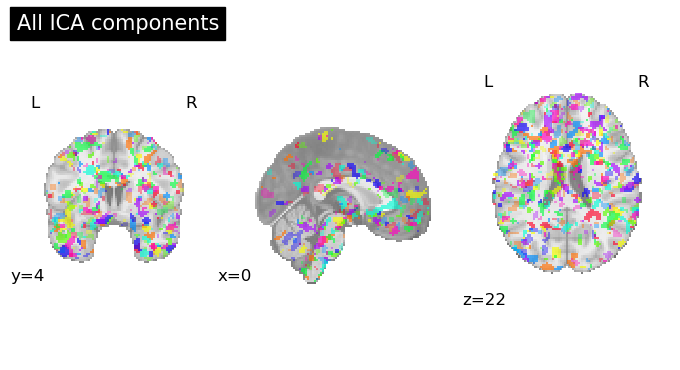

In [7]:
func_filenames = [
    '../test.nii.gz'
]
canica = CanICA(
    n_components=10,
    memory='nilearn_cache',
    memory_level=2,
    verbose=10,
    mask_strategy='whole-brain-template',
    random_state=0,
    standardize='zscore_sample',
)
canica.fit(func_filenames)
plot_prob_atlas(canica.components_img_, title='All ICA components', draw_cross=False)
plt.show()

In [5]:
print('Total explained variance:', canica.score(canica.components_img_))

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 10),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._explained_variance...
_explained_variance(array([[ 9.669991e-01, ...,  2.648733e+00],
       ...,
       [-8.280038e-05, ...,  8.523819e-08]], dtype=float32), 
array([[-0.     , ..., -0.     ],
       ...,
       [ 0.00354, ..., -0.     ]], dtype=float32), per_component=False)
_______________________________________________explained_variance - 0.2s, 0.0min
Total explained variance: 0.456473920819622


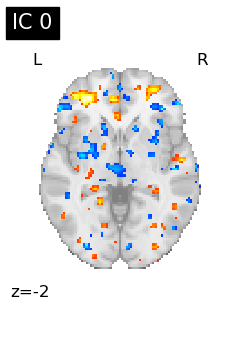

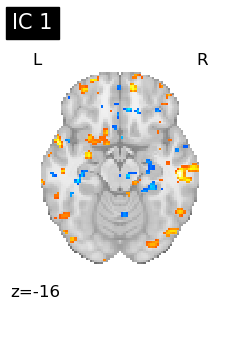

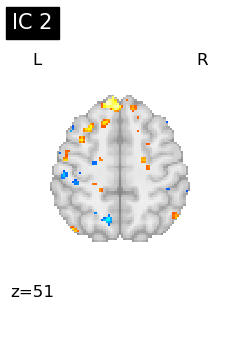

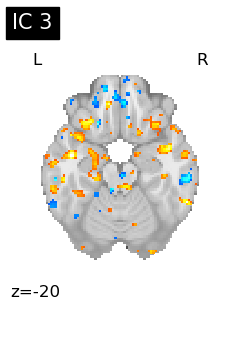

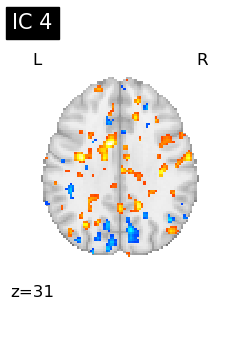

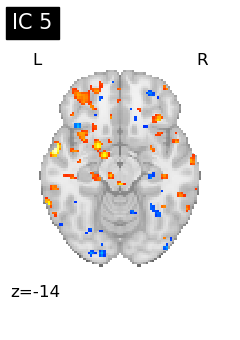

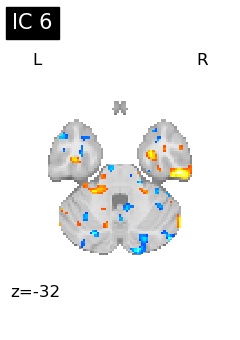

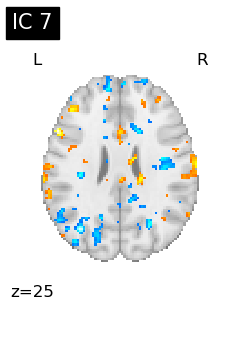

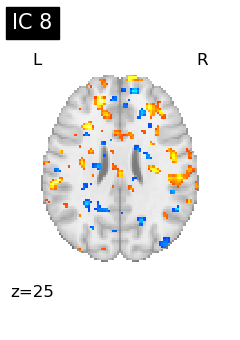

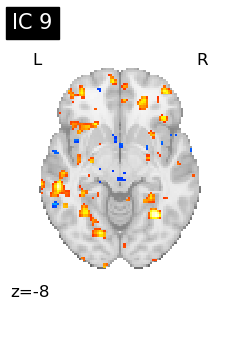

In [6]:
for i, cur_img in enumerate(iter_img(canica.components_img_)):
    plot_stat_map(cur_img, display_mode='z', title=f'IC {int(i)}', cut_coords=1, colorbar=False)

[MultiNiftiMasker.fit] Loading data from [loss_merged.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
Template whole-brain mask computation
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001459],
       ...,
       [0.001954]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.2s


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001459],
       ...,
       [0.001954]]), whiten='arbitrary-variance', fun='cube', random_state=441365315)
__________________________________________________________fastica - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001459],
       ...,
       [0.001954]]), whiten='arbitrary-variance', fun='cube', random_state=1537364731)
__________________________________________________________fastica - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001459],
       ...,
       [0.001954]]), whiten='arbitrary-variance', fun='cube', random_state=192771779)
__________________________________________

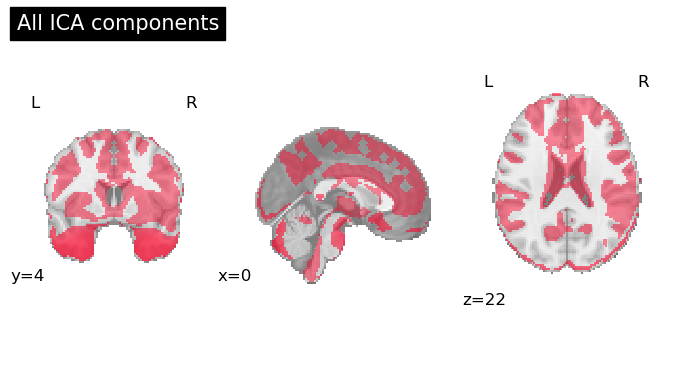

In [18]:
func_filenames = [
    'loss_merged.nii.gz'
]
canica = CanICA(
    n_components=20,
    memory='nilearn_cache',
    memory_level=2,
    verbose=10,
    mask_strategy='whole-brain-template',
    random_state=0,
    standardize='zscore_sample',
)
canica.fit(func_filenames)
plot_prob_atlas(canica.components_img_, title='All ICA components', draw_cross=False)
plt.show()

In [19]:
print('Total explained variance:', canica.score(canica.components_img_))


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._explained_variance...
_explained_variance(array([[ 3.462302e-04, ..., -6.566806e-05]], dtype=float32), array([[0.002247, ..., 0.000416]], dtype=float32), per_component=False)
_______________________________________________explained_variance - 0.0s, 0.0min
Total explained variance: 0.9328149534754481
